In [126]:
import yfinance as yf

df = yf.download('GOOG')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-10-23,136.229996,139.020004,135.110001,137.899994,137.899994,20780700
2023-10-24,139.160004,140.710007,138.750000,140.119995,140.119995,26535200
2023-10-25,129.770004,130.100006,126.089996,126.669998,126.669998,58796100


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

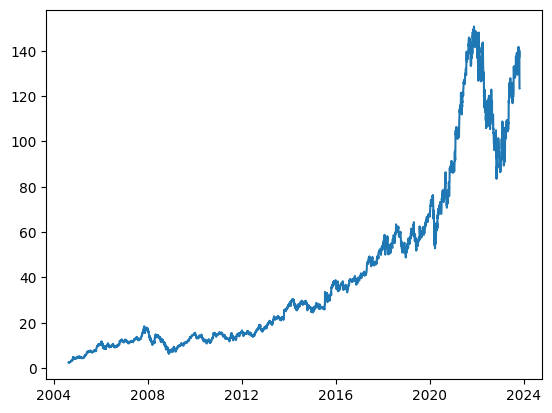

In [128]:
plt.plot(df.index, df["Adj Close"])
plt.show()

In [129]:
#train test split

training_data = list(df[:int(len(df)*0.8)]['Adj Close'])
test_data = list(df[int(len(df)*0.8):]['Adj Close'])

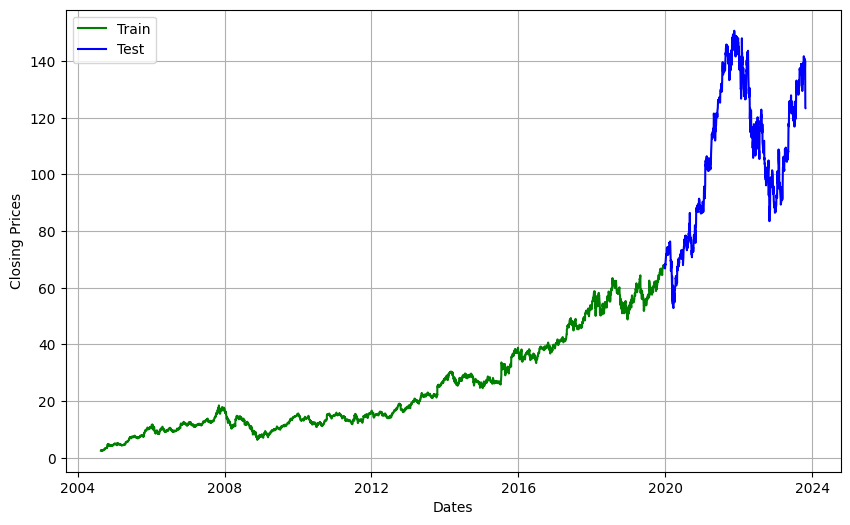

In [130]:
plt.figure(figsize=(10,6))              # visualize data upon spliting
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[:int(len(df)*0.8)]['Adj Close'], 'green', label='Train')
plt.plot(df[int(len(df)*0.8):]['Adj Close'], 'blue', label='Test')
plt.legend();

In [131]:
model_predict=[]
n_test = len(test_data)

In [ ]:
from pmdarima import auto_arima                     # auto arima can find the parameters for p d q by bruteforce
stepwise_fit = auto_arima(training_data, trace=True,suppress_warnings=True)

In [132]:
for i in range(n_test):
    model = ARIMA(training_data, order = (4,1,0))
    res = model.fit()
    out = res.forecast()
    model_predict.append(out)
    actual_predict = test_data[i]
    training_data.append(actual_predict)
    print(out)

[67.17255262]
[68.04928511]
[67.53925358]
[66.83251674]
[66.88419108]
[68.38348314]
[67.94653215]
[69.75552524]
[69.54802823]
[70.23747615]
[70.94795419]
[71.45326035]
[71.93947681]
[71.5079989]
[71.98571657]
[72.56048839]
[74.00978117]
[74.14498411]
[74.29243022]
[74.31652773]
[73.31943432]
[71.72482805]
[72.72332694]
[72.8832945]
[72.79902362]
[71.69833492]
[74.38001081]
[72.20194184]
[72.53908809]
[73.76894337]
[73.89979639]
[75.44459244]
[75.34517712]
[75.92832455]
[75.69151485]
[76.05211337]
[75.96075051]
[76.34319352]
[75.88432555]
[74.27575435]
[71.12468284]
[69.53586917]
[69.73086075]
[65.80486272]
[67.1476621]
[69.34819988]
[67.00025558]
[69.50652247]
[65.76919393]
[65.19051171]
[60.71190393]
[64.1027282]
[60.79132445]
[55.93615784]
[60.84437989]
[54.37879292]
[56.3798482]
[54.43941017]
[55.90839361]
[53.74618836]
[52.92799302]
[56.28074304]
[55.26235244]
[57.98325589]
[55.703042]
[57.23174751]
[57.95358257]
[55.71615536]
[55.92704521]
[54.88800578]
[58.91615243]
[59.34388286]

In [133]:
test_data

[68.0199966430664,
 67.59449768066406,
 66.80699920654297,
 66.85099792480469,
 68.36849975585938,
 68.03299713134766,
 69.71050262451172,
 69.66699981689453,
 70.21600341796875,
 70.99150085449219,
 71.48650360107422,
 71.96150207519531,
 71.54399871826172,
 71.95999908447266,
 72.58499908447266,
 74.01950073242188,
 74.22000122070312,
 74.29750061035156,
 74.3324966430664,
 73.33550262451172,
 71.69499969482422,
 72.62799835205078,
 72.93150329589844,
 72.79199981689453,
 71.71150207519531,
 74.2969970703125,
 72.35350036621094,
 72.4114990234375,
 73.8115005493164,
 73.96150207519531,
 75.43399810791016,
 75.43949890136719,
 75.91349792480469,
 75.73300170898438,
 76.03700256347656,
 75.9834976196289,
 76.33450317382812,
 75.90750122070312,
 74.25550079345703,
 71.07949829101562,
 69.42250061035156,
 69.65899658203125,
 65.90450286865234,
 66.96649932861328,
 69.45549774169922,
 67.06950378417969,
 69.32599639892578,
 65.9520034790039,
 64.92050170898438,
 60.77799987792969,
 64.019

In [134]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4831
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -7093.200
Date:                Mon, 30 Oct 2023   AIC                          14196.399
Time:                        14:26:07   BIC                          14228.812
Sample:                             0   HQIC                         14207.779
                               - 4831                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0361      0.007     -5.494      0.000      -0.049      -0.023
ar.L2         -0.0147      0.007     -2.105      0.035      -0.028      -0.001
ar.L3         -0.0374      0.006     -5.951      0.0

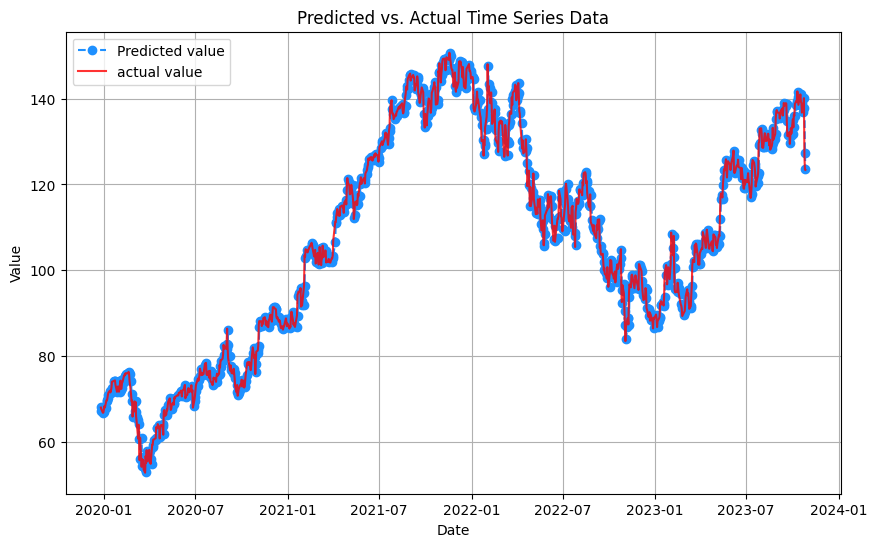

In [165]:
plt.figure(figsize=(10,6))         
plt.grid(True)


data_range = df[int(len(df)*0.8):].index
plt.plot(data_range, model_predict, color='dodgerblue', marker="o", linestyle="dashed",label="Predicted value")
plt.plot(data_range, test_data, color='red',label="actual value", alpha = 0.8)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Predicted vs. Actual Time Series Data")
plt.legend(loc='upper left')
plt.show()

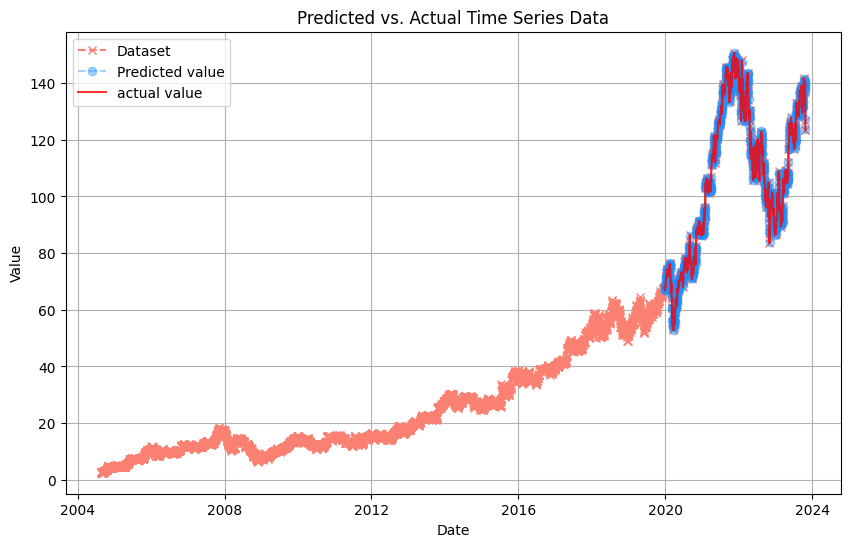

In [174]:
plt.figure(figsize=(10,6))         
plt.grid(True)

all_range = df[:].index
data_range = df[int(len(df)*0.8):].index
plt.plot(all_range, df['Adj Close'], color='salmon', marker="x", linestyle="dashed",label="Dataset")
plt.plot(data_range, model_predict, color='dodgerblue', marker="o", linestyle="dashed",label="Predicted value", alpha = 0.4)
plt.plot(data_range, test_data, color='red',label="actual value", alpha = 0.8)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Predicted vs. Actual Time Series Data")
plt.legend(loc='upper left')
plt.show()